In [ ]:
# load thư viện cần dùng
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist 
from tensorflow.keras.layers import   Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Normalization,LeakyReLU
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import cv2 as cv
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Data/face.data','rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(381, 224, 224, 3)
(381, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(304, 224, 224, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
avg = ImageDataGenerator(rotation_range=20,
                    width_shift_range=0.5,
                    height_shift_range=0.5,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(avg.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=avg.flow(X_test,y_test, batch_size=64))

<ipython-input-21-e9d57c928190>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(avg.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=avg.flow(X_test,y_test, batch_size=64))


Epoch 1/25
5/5 [==============================] - 6s 1s/step - loss: 341.4019 - accuracy: 0.2336 - val_loss: 268.8209 - val_accuracy: 0.2468
Epoch 2/25
5/5 [==============================] - 4s 940ms/step - loss: 83.6801 - accuracy: 0.2664 - val_loss: 18.8386 - val_accuracy: 0.2468
Epoch 3/25
5/5 [==============================] - 6s 1s/step - loss: 15.0578 - accuracy: 0.2599 - val_loss: 12.6530 - val_accuracy: 0.2468
Epoch 4/25
5/5 [==============================] - 4s 858ms/step - loss: 6.5443 - accuracy: 0.2829 - val_loss: 5.7048 - val_accuracy: 0.3636
Epoch 5/25
5/5 [==============================] - 4s 861ms/step - loss: 4.2223 - accuracy: 0.3684 - val_loss: 3.2413 - val_accuracy: 0.3636
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 2.1557 - accuracy: 0.4375 - val_loss: 2.4195 - val_accuracy: 0.4416
Epoch 7/25
5/5 [==============================] - 4s 873ms/step - loss: 2.0291 - accuracy: 0.4243 - val_loss: 1.2735 - val_accuracy: 0.5714
Epoch 8/25
5/5 [=====

In [ ]:
model.save('/content/drive/MyDrive/Data/AI_Face.h5')

In [ ]:
Face = load_model('/content/drive/MyDrive/Data/AI_Face.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Loss: ', test_loss)
print('Accuracy: ', test_acc)

3/3 [==============================] - 0s 36ms/step - loss: 0.2806 - accuracy: 0.8961
Loss:  0.28057560324668884
Accuracy:  0.8961039185523987


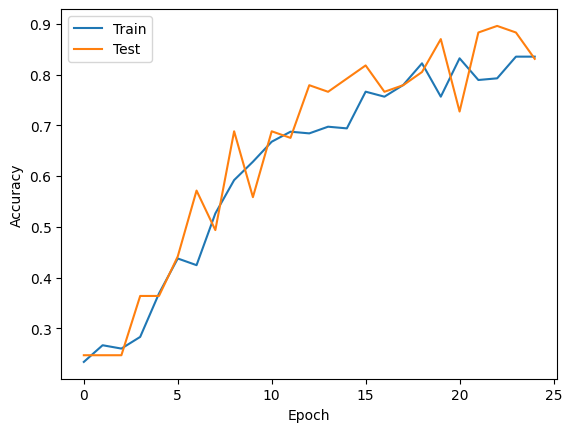

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 21ms/step
[[4.2490613e-02 9.5037591e-01 2.8658072e-03 3.5138831e-03 7.5372524e-04]]
This picture is:  Nhân [4.2490613e-02 9.5037591e-01 2.8658072e-03 3.5138831e-03 7.5372524e-04]
0.9503759


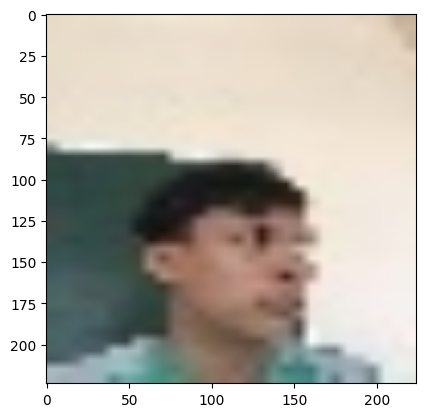

In [ ]:
Face1 = ['Thành','Nhân','Tân','Đạt','Thanh']
img = X_test[6]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", Face1[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

image = X[5]
Face2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(Face2)
plt.show()


1/1 [==============================] - 0s 68ms/step
[[0.00192553 0.01255567 0.11715397 0.02839469 0.8399702 ]]
This picture is:  Thanh [0.00192553 0.01255567 0.11715397 0.02839469 0.8399702 ]
0.8399702


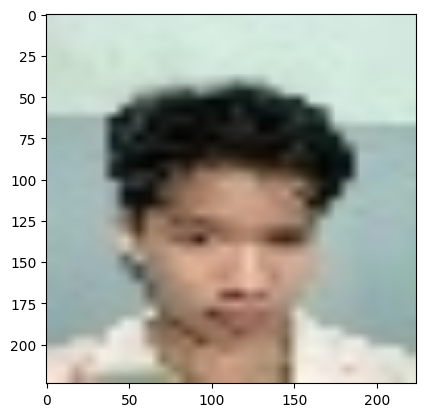

In [ ]:
Face1 = ['Thành','Nhân','Tân','Đạt','Thanh']
img = X_test[61]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", Face1[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

image = X[61]
Face2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(Face2)
plt.show()